<a href="https://colab.research.google.com/github/ShaileeYadav/Spaceship-Titanic/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files      #Importing Dataset from the system
uploaded = files.upload()

Saving test_titanic.csv to test_titanic (1).csv
Saving train_titanic.csv to train_titanic (1).csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('train_titanic.csv')# Training Dataset is now stored in a Pandas Dataframe

In [4]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


**Encoding**

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [6]:
labels=df.columns
for col in labels:
    if col in['Age','RoomService','FoodCourt', 'ShoppingMall','Spa','VRDeck']:
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

In [7]:
for col in labels:
  if col != "PassengerId":
    if df[col].dtype=='O':
        encoder=LabelEncoder()
        df[col]=encoder.fit_transform(df[col])
    elif df[col].dtype=='bool':
        df[col]=df[col].astype('int')

In [8]:
df['Transported']=df['Transported'].astype('int')

**Correlation Matrix**

In [9]:
import seaborn as sns
import matplotlib as plt

<ipython-input-10-dd8977b1d5fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

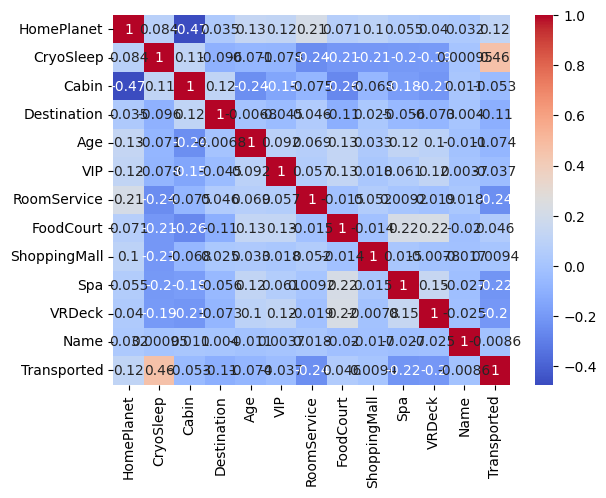

In [10]:
# Create the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)


<ipython-input-11-3fcc64887aac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

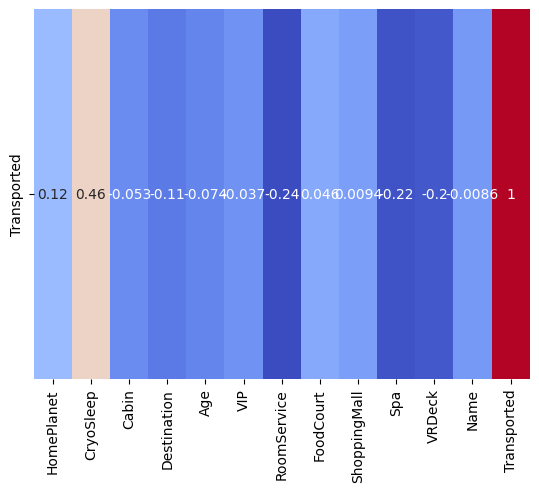

In [11]:
corr = df.corr()     #To view only the output Transported
sns.heatmap(corr.loc[['Transported'],:], yticklabels=['Transported'], annot=True, cmap='coolwarm', cbar=False)

Cabin, Destination, Age, RoomService, Spa, VRDeck has Negative Correlation with the Output Transported. Whereas PassengerId, HomePlanet, VIP, FoodCourt, ShoppingMall seems to not affect the output significantly.

Negative correlation refers to a relationship between two variables in which an increase in the value of one variable is associated with a decrease in the value of the other variable.

**Dropping Features**

In [12]:
df = df.drop(['HomePlanet', 'VIP', 'FoodCourt', 'ShoppingMall'], axis=1)
df

,PassengerId,CryoSleep,Cabin,Destination,Age,RoomService,Spa,VRDeck,Name,Transported
0,0001_01,0,149,2,39.0,0.0,0.0,0.0,5252,0
1,0002_01,0,2184,2,24.0,109.0,549.0,44.0,4502,1
2,0003_01,0,1,2,58.0,43.0,6715.0,49.0,457,0
3,0003_02,0,1,2,33.0,0.0,3329.0,193.0,7149,0
4,0004_01,0,2186,2,16.0,303.0,565.0,2.0,8319,1
...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,146,0,41.0,0.0,1643.0,74.0,3524,0
8689,9278_01,1,5280,1,18.0,0.0,0.0,0.0,4780,0
8690,9279_01,0,5285,2,26.0,0.0,1.0,0.0,3002,1
8691,9280_01,0,2131,0,32.0,0.0,353.0,3235.0,1596,0


In [ ]:
df = df.drop(['Name'], axis=1)

In [22]:
df = df.drop(['PassengerId'], axis=1)
df

,CryoSleep,Cabin,Destination,Age,RoomService,Spa,VRDeck,Transported
0,0,149,2,39.0,0.0,0.0,0.0,0
1,0,2184,2,24.0,109.0,549.0,44.0,1
2,0,1,2,58.0,43.0,6715.0,49.0,0
3,0,1,2,33.0,0.0,3329.0,193.0,0
4,0,2186,2,16.0,303.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...
8688,0,146,0,41.0,0.0,1643.0,74.0,0
8689,1,5280,1,18.0,0.0,0.0,0.0,0
8690,0,5285,2,26.0,0.0,1.0,0.0,1
8691,0,2131,0,32.0,0.0,353.0,3235.0,0


In [14]:
print(df.shape)

(8693, 9)


In [15]:
print(df.isnull().sum())

PassengerId    0
CryoSleep      0
Cabin          0
Destination    0
Age            0
RoomService    0
Spa            0
VRDeck         0
Transported    0
dtype: int64


In [16]:
df.describe()

,CryoSleep,Cabin,Destination,Age,RoomService,Spa,VRDeck,Transported
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.349362,3218.609341,1.494306,28.790291,220.009318,304.588865,298.261820,0.503624
std,0.476796,2003.884349,0.814966,14.341404,660.519050,1125.562559,1134.126417,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1341.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3218.000000,2.000000,27.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,5018.000000,2.000000,37.000000,41.000000,53.000000,40.000000,1.000000
max,1.000000,6559.000000,2.000000,79.000000,14327.000000,22408.000000,24133.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8693 non-null   object 
 1   CryoSleep    8693 non-null   int64  
 2   Cabin        8693 non-null   int64  
 3   Destination  8693 non-null   int64  
 4   Age          8693 non-null   float64
 5   RoomService  8693 non-null   float64
 6   Spa          8693 non-null   float64
 7   VRDeck       8693 non-null   float64
 8   Transported  8693 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 611.4+ KB


**Prediction Models**

Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Transported', axis=1), df['Transported'], test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 70.44%


XGBoost

In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Transported', axis=1), df['Transported'], test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 78.21%


Gradient Boost Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Transported', axis=1), df['Transported'], test_size=0.2, random_state=42)

# Train the gradient boosting model
model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.5, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 77.06%


Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Transported', axis=1), df['Transported'], test_size=0.2, random_state=42)

# Train the gradient boosting model
model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.5, random_state=42)
model.fit(X_train, y_train)

# Train a random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict the target variable for the testing dataset
y_pred = rf.predict(X_test)

# Evaluate the performance of the model on the testing dataset
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 76.14%


**Testing Data**

In [29]:
df_test= pd.read_csv('test_titanic.csv')# Testing Dataset is now stored in a Pandas Dataframe

In [30]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


**Encoding**

In [31]:
labels=df_test.columns
for col in labels:
    if col in['Age','RoomService','FoodCourt', 'ShoppingMall','Spa','VRDeck']:
        df_test[col].fillna(df_test[col].median(),inplace=True)
    else:
        df_test[col].fillna(df_test[col].mode()[0],inplace=True)

In [32]:
for col in labels:
  if col != "PassengerId":
    if df_test[col].dtype=='O':
        encoder=LabelEncoder()
        df_test[col]=encoder.fit_transform(df_test[col])
    elif df_test[col].dtype=='bool':
        df_test[col]=df_test[col].astype('int')

**Dropping Features**

In [33]:
df_test = df_test.drop(['HomePlanet', 'VIP', 'FoodCourt', 'ShoppingMall'], axis=1)
df_test

,PassengerId,CryoSleep,Cabin,Destination,Age,RoomService,Spa,VRDeck,Name
0,0013_01,1,2784,2,27.0,0.0,0.0,0.0,2912
1,0018_01,0,1867,2,19.0,0.0,2823.0,0.0,2406
2,0019_01,1,257,0,31.0,0.0,0.0,0.0,3376
3,0021_01,0,259,2,38.0,0.0,181.0,585.0,2711
4,0023_01,0,1940,2,20.0,10.0,0.0,0.0,668
...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,2679,2,34.0,0.0,0.0,0.0,2105
4273,9269_01,0,2691,2,42.0,0.0,10.0,144.0,2654
4274,9271_01,1,602,0,26.0,0.0,0.0,0.0,2085
4275,9273_01,0,603,2,26.0,0.0,0.0,523.0,2327


In [34]:
df_test = df_test.drop(['Name'], axis=1)
df_test

,PassengerId,CryoSleep,Cabin,Destination,Age,RoomService,Spa,VRDeck
0,0013_01,1,2784,2,27.0,0.0,0.0,0.0
1,0018_01,0,1867,2,19.0,0.0,2823.0,0.0
2,0019_01,1,257,0,31.0,0.0,0.0,0.0
3,0021_01,0,259,2,38.0,0.0,181.0,585.0
4,0023_01,0,1940,2,20.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4272,9266_02,1,2679,2,34.0,0.0,0.0,0.0
4273,9269_01,0,2691,2,42.0,0.0,10.0,144.0
4274,9271_01,1,602,0,26.0,0.0,0.0,0.0
4275,9273_01,0,603,2,26.0,0.0,0.0,523.0


**Output Result**

XGBoost

We are using XGBoost because it had the Highest Accuracy of all the models

In [36]:
X=df_test.drop(['PassengerId'], axis=1)

# Make predictions on the test set
y_pred_test = model.predict(X)

**CSV File of the Output**

In [42]:
passenger_ids = df_test['PassengerId'].values

# Map the 0's and 1's in `y_pred` to False and True, respectively
transported_str = np.where(y_pred==1, 'True', 'False')

# Convert the mapped values to a Pandas Series
transported = pd.Series(transported_str, name='Transported')

# Replace 'FALSE' with False and 'TRUE' with True
#transported = transported.replace({'FALSE': 'False', 'TRUE': 'True'})

df_test["PassengerId"] = df_test["PassengerId"].astype(str)

# Replace 'FALSE' with False and 'TRUE' with True
transported = transported.replace({'FALSE': False, 'TRUE': True})

# Combine the passenger IDs and the transport predictions into a single DataFrame
output_df = pd.concat([df_test['PassengerId'], transported], axis=1)

# Save the DataFrame to a CSV file
output_df.to_csv('output.csv', index=False)